In [1]:
from scopesim_templates.extragalactic import galaxy
from scopesim_templates.extragalactic import galaxy3d
from scopesim_templates.extragalactic import spiral_two_component
from scopesim_templates.extragalactic import elliptical
from scopesim_templates.misc import point_source
from scopesim_templates.misc import source_from_file
from scopesim_templates.misc import source_from_array
from scopesim_templates.stellar import star,clusters
from scopesim_templates.calibration import empty_sky
import matplotlib.pyplot as plt
import os
import numpy as np 
from scopesim_templates.stellar import stars

import astropy.units as u 
from astropy.io.fits import Header
from astropy.visualization import simple_norm
import yaml
from astropy.io import fits

from matplotlib.colors import LogNorm

import scopesim as sim

In [2]:


sim.rc.__config__["!SIM.file.local_packages_path"] = "..\inst_pkgs\\"
yaml_dicts = []
with open("..\inst_pkgs\MICADO\default.yaml") as f:
    yaml_dicts += [dic for dic in yaml.full_load_all(f)]
mspec = yaml_dicts

In [3]:
def makeFits(sed="sne/sn1a", amp=18, filt_cur="Ks", xcoord=0, ycoord=0, exposure_time=1000, fov="IMG_4mas", AOsystem="SCAO", airmass=1.2, fw1="open", fw2="Ks", humidity=0.1, temp=7, pressure=0.755):
    source = point_source(sed, amp, filt_cur, xcoord, ycoord)
    file_name = f"point{amp}_{filt_cur}_{fov}_{AOsystem}_espt{exposure_time}"
    print(file_name)
    cmds = sim.UserCommands(use_instrument="MICADO",
                    set_modes=[AOsystem,fov], #"SCAO", 
                    properties={"!OBS.dit": exposure_time,
                                "!OBS.airmass": airmass,
                                "!OBS.filter_name_fw1": fw1,
                                "!OBS.filter_name_fw2": fw2,
                                "!ATMO.humidity" : humidity,
                                "!ATMO.temperature" : temp,
                                "!ATMO.pressure" : pressure
                                })
    micado = sim.OpticalTrain(cmds)
    micado.observe(source)
    hdus = micado.readout(filename=f"../fitsOutput/{file_name}.fits")

    plt.imshow(hdus[0][1].data)
    plt.show()
    for i in range(len(source.spectra)):
        try:
            os.remove(f"../fitsOutput/spec{i}_{file_name}.fits")
        except:
            pass  
        source.spectra[i].to_fits(f"../fitsOutput/spec{i}_{file_name}.fits", wavelengths=None, flux_unit=None, area=None, vegaspec=None)

    print("spec list tot = ", len(source.spectra))
    

In [4]:
from astropy.cosmology import FlatLambdaCDM

H0 = 69.6*u.km/u.s/u.Mpc

#O_vac = 0.714

O_mat = 0.286

z_range = np.geomspace(0.0001, 10, 100)

cosmo = FlatLambdaCDM(H0=69.6, Om0=O_mat)

scale = 1./cosmo.arcsec_per_kpc_proper(z_range)


plt.plot(z_range,scale)

plt.title("Angular Scale vs Redshift")
plt.ylabel("pc/mas")
plt.xlabel("z")
plt.show()
#print(scale)

In [32]:
print(max(scale))
print(scale[83])
print(z_range[83])

In [9]:
galellip = elliptical(r_eff=1,pixel_scale=.004,amplitude=20,filter_name="J",x_offset=0,y_offset=0)

In [15]:
import yaml

local_package_folder = "..\inst_pkgs\\"

instrument_yaml = f"{local_package_folder}/MICADO/MICADO.yaml"


cmds = sim.UserCommands(use_instrument="MICADO")
print(list(cmds.list_modes()))

[('SCAO', 'SCAO optical system'), ('MCAO', 'MCAO optical system'), ('IMG_4mas', 'wide-field imager', '4mas/pix'), ('IMG_1.5mas', 'high resolution imager', '1.5mas/pix'), ('IMG_HCI', 'High contrast imaging'), ('SPEC_15000x20', 'spectrograph', 'slit size 15000x20mas'), ('SPEC_3000x48', 'spectrograph', 'slit size 3000x48mas'), ('SPEC_3000x16', 'spectrograph', 'slit size 3000x16mas'), ('SPEC_15000x50', 'spectrograph', 'slit size 15000x50mas', 'DEPRECATED'), ('SPEC_3000x50', 'spectrograph', 'slit size 3000x50mas', 'DEPRECATED'), ('SPEC_3000x20', 'spectrograph', 'slit size 3000x20mas', 'DEPRECATED')]


In [16]:
#gal3d1 = galaxy3d(sed="brown/NGC3310", pixel_scale=0.5,r_eff=5,ellip=0.5)

In [404]:
gal3d = galaxy3d(sed="brown/Arp256N",z=2,r_eff=10,amplitude=20,filter_curve="Ks", pixel_scale=0.05, n=2.2,ellip= 0.5, theta=20)

100%|#####################################| 77.4k/77.4k [00:00<00:00, 77.7MB/s]


In [410]:
gal = galaxy(sed="brown/Arp256N",z=0,r_eff=3,amplitude=20,filter_curve="Ks", pixel_scale=0.05)

In [6]:
galellip2 = elliptical(r_eff=3.2e-5, pixel_scale=0.1,amplitude=20,filter_name="Ks",ellipticity=0.4)
nova_withgal2 = point_source(sed="sne/sn1a", amplitude=20, filter_curve="Ks",   x = 0, y=-2.2e-5)

In [150]:
twospiral = spiral_two_component(extent=3.5,fluxes=(19,19),offset=(0,0))

https://scopesim.univie.ac.at/scopesim_templates/spiral_two_component.fits


In [5]:
starset = stars(filter_name="Ks", amplitudes = np.linspace(18,23,6)*u.mag, spec_types= ["A0V", "G2V", "K0III"] *2, x=np.linspace(-1,1,6), y=[0]*6)

In [11]:
starset2 = stars(filter_name="Ks", amplitudes = [18]*6*u.mag, spec_types= ["A0V", "G2V", "K0III"] *2, x=[0]*6, y=np.linspace(-1,1,6))

['K0III', 'A0V', 'G2V']


In [4]:
starset3 = stars(filter_name="Ks", amplitudes = [18]*6*u.mag, spec_types= ["A0V", "G2V", "K0III"] *2, x=np.linspace(-1,1,6), y=np.linspace(-1,1,6))

In [96]:
star1 = star(filter_name="Ks", amplitude=15, spec_type="M0V")

In [4]:
cluster = clusters.cluster(mass=1000,         # Msun
                             distance=50000,    # parsec
                             core_radius=0.3,   # parsec
                             seed=68770)

imf - sample_imf: Setting maximum allowed mass to 1000
imf - sample_imf: Loop 0 added 9.68e+02 Msun to previous total of 0.00e+00 Msun
imf - sample_imf: Loop 1 added 7.72e+01 Msun to previous total of 9.68e+02 Msun


In [310]:
bigcluster = clusters.cluster(mass=100000, distance=50000,core_radius=3,seed=789456)

imf - sample_imf: Setting maximum allowed mass to 100000
imf - sample_imf: Loop 0 added 1.05e+05 Msun to previous total of 0.00e+00 Msun


In [335]:
densecluster = clusters.cluster(mass=15000, distance=50000,core_radius=0.3,seed=7894)

imf - sample_imf: Setting maximum allowed mass to 15000
imf - sample_imf: Loop 0 added 1.84e+04 Msun to previous total of 0.00e+00 Msun


In [13]:
nova1 = point_source(sed="sne/sn1a", amplitude=15, filter_curve="Ks",   x = -1.8, y=-1.8)
nova2 = point_source(sed="sne/sn1a", amplitude=15.5, filter_curve="Ks", x = -0.9, y=-1.8)
nova3 = point_source(sed="sne/sn1a", amplitude=16, filter_curve="Ks",   x = 0, y=-1.8)
nova4 = point_source(sed="sne/sn1a", amplitude=16.5, filter_curve="Ks", x = 0.9, y=-1.8)
nova5 = point_source(sed="sne/sn1a", amplitude=17, filter_curve="Ks",   x = 1.8, y=-1.8)
nova6 = point_source(sed="sne/sn1a", amplitude=17.5, filter_curve="Ks", x = -1.8, y=-0.9)
nova7 = point_source(sed="sne/sn1a", amplitude=18, filter_curve="Ks",   x = -0.9, y=-0.9)
nova8 = point_source(sed="sne/sn1a", amplitude=18.5, filter_curve="Ks", x = 0, y=-0.9)
nova9 = point_source(sed="sne/sn1a", amplitude=19, filter_curve="Ks",   x = 0.9, y=-0.9)
nova10 = point_source(sed="sne/sn1a", amplitude=19.5, filter_curve="Ks", x = 1.8, y=-0.9)
nova11 = point_source(sed="sne/sn1a", amplitude=20, filter_curve="Ks",   x = -1.8, y=0)
nova12 = point_source(sed="sne/sn1a", amplitude=20.5, filter_curve="Ks", x = -0.9, y=0)
nova13 = point_source(sed="sne/sn1a", amplitude=21, filter_curve="Ks",   x = 0, y=0)
nova14 = point_source(sed="sne/sn1a", amplitude=21.5, filter_curve="Ks", x = 0.9, y=0)
nova15 = point_source(sed="sne/sn1a", amplitude=22, filter_curve="Ks",   x = 1.8, y=0)
nova16 = point_source(sed="sne/sn1a", amplitude=22.5, filter_curve="Ks", x = -1.8, y=0.9)
nova17 = point_source(sed="sne/sn1a", amplitude=23, filter_curve="Ks",   x = -0.9, y=0.9)
nova18 = point_source(sed="sne/sn1a", amplitude=23.5, filter_curve="Ks", x = 0, y=0.9)
nova19 = point_source(sed="sne/sn1a", amplitude=24, filter_curve="Ks",   x = 0.9, y=0.9)
nova20 = point_source(sed="sne/sn1a", amplitude=24.5, filter_curve="Ks", x = 1.8, y=0.9)
nova21 = point_source(sed="sne/sn1a", amplitude=25, filter_curve="Ks",   x = -1.8, y=1.8)
nova22 = point_source(sed="sne/sn1a", amplitude=25.5, filter_curve="Ks", x = -0.9, y=1.8)
nova23 = point_source(sed="sne/sn1a", amplitude=26, filter_curve="Ks",   x = 0, y=1.8)
nova24 = point_source(sed="sne/sn1a", amplitude=26.5, filter_curve="Ks", x = 0.9, y=1.8)
nova25 = point_source(sed="sne/sn1a", amplitude=27, filter_curve="Ks",   x = 1.8, y=1.8)



In [13]:
nova26 = point_source(sed="sne/sn1a", amplitude=21, filter_curve="Ks",   x = 0.2, y=0)

nova27 = point_source(sed="sne/sn1a", amplitude=19.5, filter_curve="Ks", x = 0, y=0)

nova28 = point_source(sed="sne/sn1a", amplitude=18, filter_curve="Ks", x = 0, y=0)


In [73]:
nova31 = point_source(sed="sne/sn1a", amplitude=15, filter_curve="Ks",   x = 0, y=0)
nova32 = point_source(sed="sne/sn1a", amplitude=15.5, filter_curve="Ks", x = 0, y=0)
nova33 = point_source(sed="sne/sn1a", amplitude=16, filter_curve="Ks",   x = 0, y=0)
nova34 = point_source(sed="sne/sn1a", amplitude=16.5, filter_curve="Ks", x = 0, y=0)
nova35 = point_source(sed="sne/sn1a", amplitude=17, filter_curve="Ks",   x = 0, y=0)
nova36 = point_source(sed="sne/sn1a", amplitude=17.5, filter_curve="Ks", x = 0, y=0)
nova37 = point_source(sed="sne/sn1a", amplitude=18, filter_curve="Ks",   x = 0, y=0)
nova38 = point_source(sed="sne/sn1a", amplitude=18.5, filter_curve="Ks", x = 0, y=0)
nova39 = point_source(sed="sne/sn1a", amplitude=19, filter_curve="Ks",   x = 0, y=0)
nova40 = point_source(sed="sne/sn1a", amplitude=19.5, filter_curve="Ks", x = 0, y=0)
nova41 = point_source(sed="sne/sn1a", amplitude=20, filter_curve="Ks",   x = 0, y=0)
nova42 = point_source(sed="sne/sn1a", amplitude=20.5, filter_curve="Ks", x = 0, y=0)
nova43 = point_source(sed="sne/sn1a", amplitude=21, filter_curve="Ks",   x = 0, y=0)
nova44 = point_source(sed="sne/sn1a", amplitude=21.5, filter_curve="Ks", x = 0, y=0)
nova45 = point_source(sed="sne/sn1a", amplitude=22, filter_curve="Ks",   x = 0, y=0)
nova46 = point_source(sed="sne/sn1a", amplitude=22.5, filter_curve="Ks", x = 0, y=0)
nova47 = point_source(sed="sne/sn1a", amplitude=23, filter_curve="Ks",   x = 0, y=0)
nova48 = point_source(sed="sne/sn1a", amplitude=23.5, filter_curve="Ks", x = 0, y=0)
nova49 = point_source(sed="sne/sn1a", amplitude=24, filter_curve="Ks",   x = 0, y=0)
nova50 = point_source(sed="sne/sn1a", amplitude=24.5, filter_curve="Ks", x = 0, y=0)
nova51 = point_source(sed="sne/sn1a", amplitude=25, filter_curve="Ks",   x = 0, y=0)
nova52 = point_source(sed="sne/sn1a", amplitude=25.5, filter_curve="Ks", x = 0, y=0)
nova53 = point_source(sed="sne/sn1a", amplitude=26, filter_curve="Ks",   x = 0, y=0)
nova54 = point_source(sed="sne/sn1a", amplitude=26.5, filter_curve="Ks", x = 0, y=0)
nova55 = point_source(sed="sne/sn1a", amplitude=27, filter_curve="Ks",   x = 0, y=0)


In [20]:
gal2stest = spiral_two_component(extent=1, fluxes=(300, 300))

In [4]:
emptysky = empty_sky()

In [7]:
galellipm23 = elliptical(r_eff=2,pixel_scale=0.004,amplitude=23*u.mag,filter_name="Ks",ellipticity=0.4,x_offset=1)
novam24p5 = point_source(sed="sne/sn1a", amplitude=24.5, filter_curve="Ks", x = 0, y=0)

In [6]:
galellipm17 = elliptical(r_eff=2,pixel_scale=0.004,amplitude=17*u.mag,filter_name="Ks",ellipticity=0.4,x_offset=.1,n=3)

In [102]:
galellipm19 = elliptical(r_eff=2,pixel_scale=0.004,amplitude=19*u.mag,filter_name="Ks",ellipticity=0.4,x_offset=.1,n=3)

In [5]:
galellipm27small = elliptical(r_eff=.5,pixel_scale=0.004,amplitude=27,filter_name="Ks",ellipticity=0.4,x_offset=1)

In [75]:
galellipJm18 = elliptical(r_eff=2,pixel_scale=0.004,amplitude=18*u.mag,filter_name="J",ellipticity=0.4,x_offset=.1,n=3)
novaJm26 = point_source(sed="sne/sn1a", amplitude=26, filter_curve="J", x = 0, y=0)

In [76]:
galellip = elliptical(r_eff=2,pixel_scale=.0015,amplitude=14,filter_name="Ks",ellipticity=0.4)

In [6]:
novaofffset = point_source(sed="sne/sn1a", amplitude=23, filter_curve="Ks", x = 1, y=.5)
galellipoffset = elliptical(r_eff=2,pixel_scale=0.004,amplitude=16,filter_name="Ks",ellipticity=0.4,x_offset=1.1,y_offset=.5,n=3)

In [7]:
source = novaofffset + galellipoffset
#source = bigcluster
#source = densecluster
#source = galellipm17 + novam24p5 
#source = galellipJm18 + novaJm26
#source = galellipm27small
#source = cluster 
#source = starset3
#source = nova1 + nova2 + nova3 + nova4 + nova5 + nova6 + nova7 + nova8 + nova9 + nova10 + nova11 + nova12 + nova13 + nova14 + nova15 + nova16 + nova17 + nova18 + nova19 + nova20 + nova21 + nova22 + nova23 + nova24 + nova25 
#source = nova26 + nova1 + nova2 + nova3 + nova4 + nova5 + nova6 + nova7 + nova8 + nova9 + nova10 + nova11 + nova12 + nova13 + nova14 + nova15 + nova16 + nova17 + nova18 + nova19 + nova20 + nova21 + nova22 + nova23 + nova24 + nova25 
#source = star1
#source = nova31
#source = emptysky
#source = galellip
#source = gal2stest
#source = gal
#source = point_source(sed="sne/sn1a", amplitude=29, filter_curve="Ks",   x = 0, y=0)

In [9]:
print(source.fields)


In [81]:
#source.spectra[1].plot()
#plt.title("A0V Spectrum")

#source.spectra[2].plot()
#plt.title("K0III Spectrum")
#plt.savefig('C:/Users/krist/Dropbox/masters thesis/figs/specA0V')

In [87]:
#source.spectra[2].plot()
#plt.title("K0III Spectrum")
#plt.savefig('C:/Users/krist/Dropbox/masters thesis/figs/specK0III')

In [80]:

#source.plot()
#plt.xlabel("arc-seconds")
#plt.ylabel("arc-seconds")
#plt.title(r'Star Cluser mass = 1000M$_\odot$, Distance = 50000pc')
#plt.title("Point Source Grid")

#plt.imshow(np.log10(galellip2.fields[0].data), origin="lower")
#plt.imshow(source.fields[0].data)
#plt.imshow(gal2stest.fields[0].data)


In [8]:
exposure_time = 1000

#file_name = f"ellip22_nova24p5_Ks_SCAO_4mas_espt{exposure_time}"
file_name = f"offsettest_SCAO_4mas_espt{exposure_time}"

cmds = sim.UserCommands(use_instrument="MICADO",
                        set_modes=["SCAO","IMG_4mas"],
                        properties={"!OBS.dit": exposure_time,
                                #"!DET.width": 12288,
                                #"!DET.height": 12288,
                                #"!OBS.airmass": 2.25,
                                #"!OBS.filter_name_fw1": "J",
                                #"!OBS.filter_name_fw2": "open",
                                #"!SIM.spectral.wave_mid": 1.578,
                                #"!TEL.temperature" : 20,
                                #"!ATMO.humidity" : 1,
                                #"!ATMO.temperature" : 20,
                                #"!ATMO.temperature" : 10,
                                #"!ATMO.pressure" : 1
                                })
#print(cmds)


micado = sim.OpticalTrain(cmds)
micado.observe(source)
hdus = micado.readout(filename=f"../fitsOutput/{file_name}.fits")
#print(micado.effects)


 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


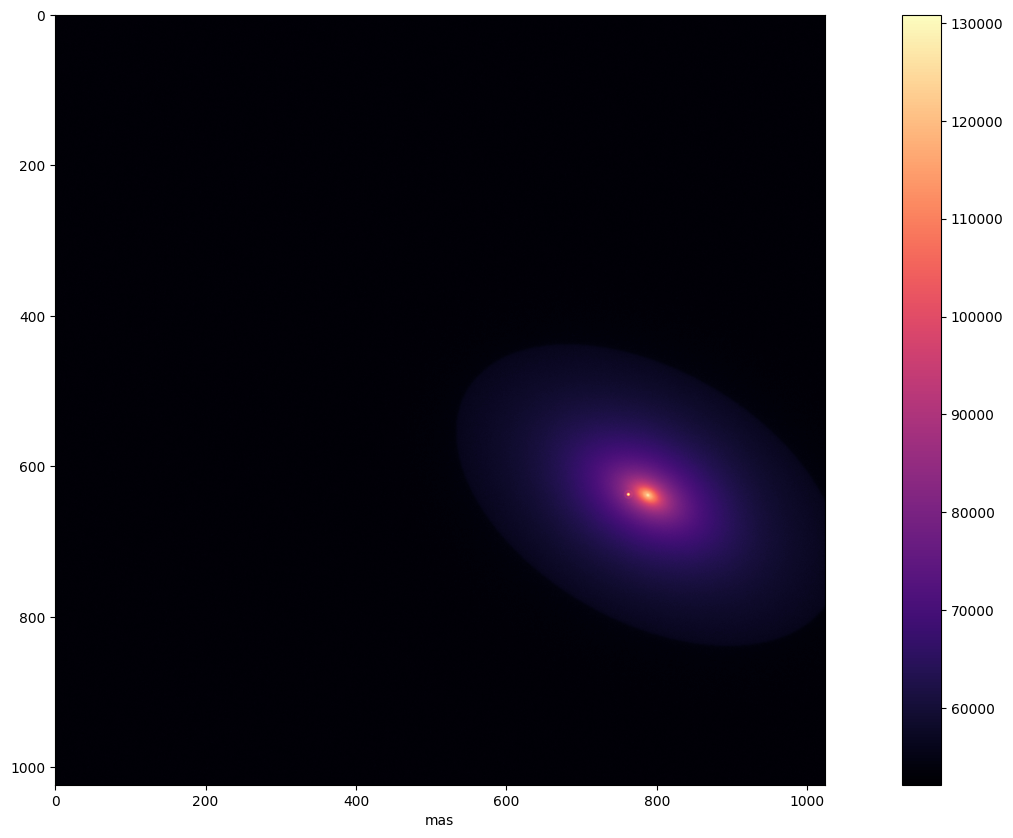

In [9]:
image = np.array(hdus[0][1].data)
norm = simple_norm(image, 'sqrt')

plt.figure(figsize=(20,10))
plt.imshow(image,cmap="magma")
plt.xlabel("mas")
#plt.title("Empty Sky Frame", fontsize=20)
plt.colorbar()
plt.show()

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


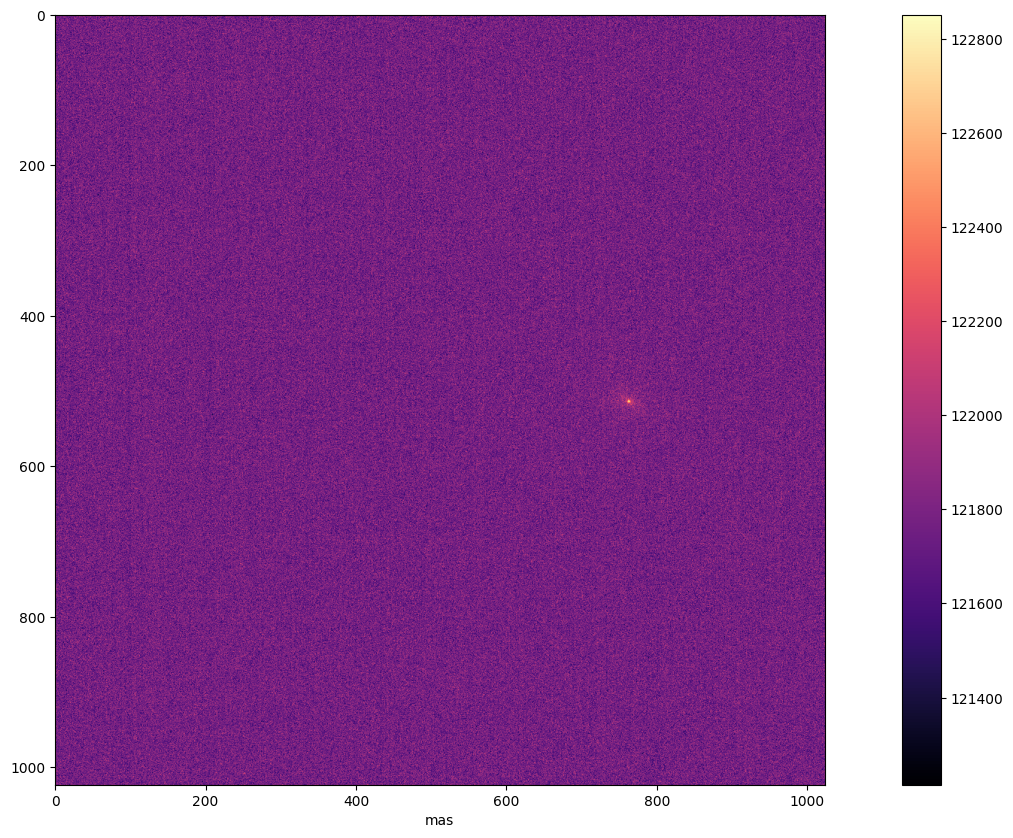

spec list tot =  1


In [83]:
micado = sim.OpticalTrain(cmds)
micado.observe(source)
hdus = micado.readout(filename=f"../fitsOutput/{file_name}.fits")
#print(micado.effects)


plt.figure(figsize=(20,10))
plt.imshow(hdus[0][1].data,cmap="magma")
plt.xlabel("mas")
#plt.title("Empty Sky Frame", fontsize=20)
plt.colorbar()
plt.show()
#try:
#    os.remove(f"../fitsOutput/spec_{file_name}.fits")
#except:
#    pass  
#source.spectra[0].to_fits(f"../fitsOutput/spec_{file_name}.fits", wavelengths=None, flux_unit=None, area=None,
#                vegaspec=None)

#print("spec list tot = ", len(source.spectra))

#source.spectra[1].to_fits(f"fitsOutput/spec2_{file_name}.fits", wavelengths=None, flux_unit=None, area=None,
#                vegaspec=None)

In [123]:
print(type(hdus[0][1].data[0][0]))

<class 'numpy.float64'>


In [245]:
cmds2 = sim.UserCommands(use_instrument="MICADO",
                         set_modes=["MCAO","SPEC_3000x16"],
                         properties={"!OBS.dit": 5000,
                                     #"!SIM.spectral.wave_mid": ,
                                     "!OBS.filter_name_fw1": "open",
                                     #"!DET.height": 2048,
                                     #"!DET.width": 2048
                         })

In [104]:
file_name = f"star1_SPEC_3000x16_MCAO_espt3600"
micado = sim.OpticalTrain(cmds2)
micado.observe(source)
hdus = micado.readout(filename=f"../fitsOutput/{file_name}.fits")
#print(micado.effects)


 FOVs:   0%|          | 0/10 [00:00<?, ?it/s]

astar.scopesim.effects.spectral_trace_list_utils - Mapping ORDER_3_1
astar.scopesim.effects.spectral_trace_list_utils - Spectral trace ORDER_3_1: footprint is outside FoV


 FOVs:  10%|█         | 1/10 [00:00<00:06,  1.44it/s]

astar.scopesim.effects.spectral_trace_list_utils - Mapping ORDER_3_1
astar.scopesim.effects.spectral_trace_list_utils - Spectral trace ORDER_3_1: footprint is outside FoV


 FOVs:  20%|██        | 2/10 [01:32<07:15, 54.41s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping ORDER_4_1


 FOVs:  30%|███       | 3/10 [02:49<07:31, 64.51s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping ORDER_5_1
astar.scopesim.effects.spectral_trace_list_utils - Spectral trace ORDER_5_1: footprint is outside FoV


 FOVs:  40%|████      | 4/10 [03:30<05:32, 55.37s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping ORDER_5_1
astar.scopesim.effects.spectral_trace_list_utils - Spectral trace ORDER_5_1: footprint is outside FoV


 FOVs:  50%|█████     | 5/10 [03:45<03:24, 40.94s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping ORDER_6_1
astar.scopesim.effects.spectral_trace_list_utils - Spectral trace ORDER_6_1: footprint is outside FoV


 FOVs:  60%|██████    | 6/10 [04:33<02:52, 43.03s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping ORDER_6_2
astar.scopesim.effects.spectral_trace_list_utils - Spectral trace ORDER_6_2: footprint is outside FoV


 FOVs:  70%|███████   | 7/10 [04:54<01:47, 35.95s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping ORDER_7_1
astar.scopesim.effects.spectral_trace_list_utils - Spectral trace ORDER_7_1: footprint is outside FoV


 FOVs:  80%|████████  | 8/10 [05:12<01:00, 30.17s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping ORDER_7_2
astar.scopesim.effects.spectral_trace_list_utils - Spectral trace ORDER_7_2: footprint is outside FoV


 FOVs:  90%|█████████ | 9/10 [05:30<00:26, 26.56s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping ORDER_8_2


 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


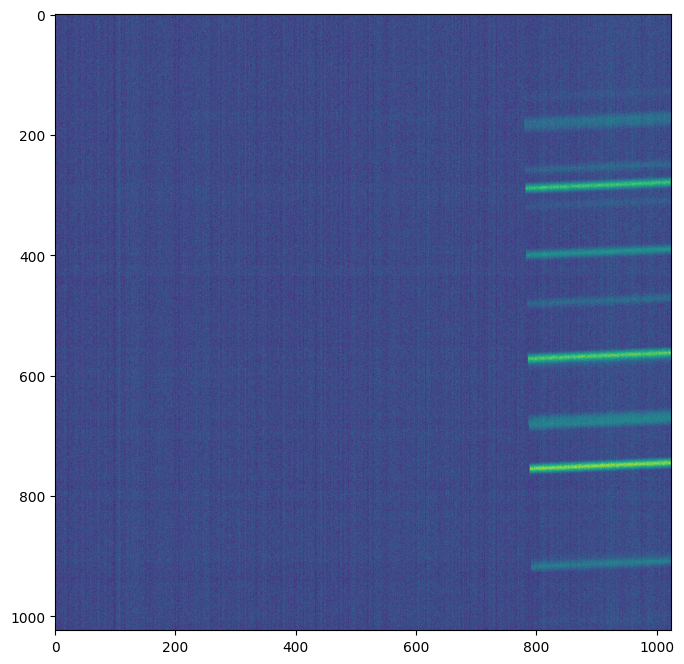

In [107]:
plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

In [80]:
print(cmds2)

CurrSys contents:
├─OBS: 
│ ├─instrument: MICADO
│ ├─modes: ['SCAO', 'SPEC_3000x48']
│ ├─airmass: 1.2
│ ├─declination: -30
│ ├─hour_angle: 0
│ ├─pupil_angle: 0
│ ├─dit: 5000
│ ├─ndit: 1
│ ├─catg: SCIENCE
│ ├─tech: IMAGE
│ ├─type: OBJECT
│ ├─mjdobs: 2022-05-04T02:30:00
│ ├─tplstart: 2022-05-04T02:30:00
│ ├─tplexpno: 0
│ ├─tplno: 0
│ ├─obsname: MyScienceTest
│ ├─ra: 0.0
│ ├─dec: 0.0
│ ├─filter_name_fw1: open
│ ├─filter_name_fw2: open
│ ├─filter_name_pupil: open
│ ├─trace_file: TRACE_MICADO.fits
│ └─slit_file: MASK_slit_3000x48.dat
├─ATMO: 
│ ├─background: 
│ │ ├─filter_name: Ks
│ │ ├─value: 13.6
│ │ └─unit: mag
│ ├─spectrum: 
│ │ └─filename: TER_armazones_default_FULL_IMG.dat
│ ├─location: Armazones
│ ├─altitude: 3060
│ ├─longitude: -70.1918
│ ├─latitude: -24.5899
│ ├─temperature: 7
│ ├─humidity: 0.1
│ ├─pressure: 0.755
│ ├─pwv: 2.5
│ ├─airmass: !OBS.airmass
│ ├─pupil_angle: !OBS.pupil_angle
│ └─pixel_scale: !INST.pixel_scale
├─TEL: 
│ ├─ter_curve: 
│ │ └─filename: TER_ELT_5_mirror.dat
│

In [68]:
#print(micado.effects[0:22])
#print(micado.effects[22:])

In [240]:
print(micado.effects.field)

<bound method Table.field of <Table length=23>
   element                 name             ... included
    str13                 str29             ...   bool  
------------- ----------------------------- ... --------
    armazones            skycalc_atmosphere ...     True
          ELT          telescope_reflection ...     True
       MICADO        micado_static_surfaces ...     True
       MICADO              micado_ncpas_psf ...     True
       MICADO       filter_wheel_1 : [open] ...     True
       MICADO          filter_wheel_2 : [H] ...     True
       MICADO          pupil_wheel : [open] ...     True
   MICADO_DET           full_detector_array ...    False
   MICADO_DET               detector_window ...     True
   MICADO_DET                      qe_curve ...     True
          ...                           ... ...      ...
   MICADO_DET            detector_linearity ...     True
   MICADO_DET       border_reference_pixels ...     True
   MICADO_DET                 readout_noi

{'object': 'configuration', 'alias': 'OBS', 'name': 'MICADO_default_configuration', 'description': 'default parameters needed for a MICADO simulation', 'date_modified': datetime.date(2023, 7, 13), 'changes': ['2023-07-13 (OC) add modes for FDR slits, deprecate pre-FDR slits'], 'packages': ['Armazones', 'ELT', 'MORFEO', 'MICADO'], 'yamls': ['Armazones.yaml', 'ELT.yaml', 'MICADO.yaml', 'MICADO_H4RG.yaml'], 'properties': {'instrument': 'MICADO', 'modes': ['SCAO', 'IMG_4mas'], 'airmass': 1.2, 'declination': -30, 'hour_angle': 0, 'pupil_angle': 0, 'dit': 60, 'ndit': 1, 'catg': 'SCIENCE', 'tech': 'IMAGE', 'type': 'OBJECT', 'mjdobs': '2022-05-04T02:30:00', 'tplstart': '2022-05-04T02:30:00', 'tplexpno': 0, 'tplno': 0, 'obsname': 'MyScienceTest', 'ra': 0.0, 'dec': 0.0}, 'mode_yamls': [{'object': 'instrument', 'alias': 'OBS', 'name': 'SCAO', 'description': 'SCAO optical system', 'yamls': ['MICADO_Standalone_RO.yaml']}, 

{'object': 'instrument', 'alias': 'OBS', 'name': 'MCAO', 'description': 'MCAO optical system', 'yamls': ['MORFEO.yaml']}, 

{'object': 'observation', 'alias': 'OBS', 'name': 'IMG_4mas', 'description': 'wide-field imager  : 4mas/pix', 'yamls': ['MICADO_IMG_wide.yaml'], 'properties': {'filter_name_fw1': 'open', 'filter_name_fw2': 'Ks', 'filter_name_pupil': 'open'}}, 

{'object': 'observation', 'alias': 'OBS', 'name': 'IMG_1.5mas', 'description': 'high resolution imager  : 1.5mas/pix', 'yamls': ['MICADO_IMG_zoom.yaml'], 'properties': {'filter_name_fw1': 'open', 'filter_name_fw2': 'Ks', 'filter_name_pupil': 'open'}}, 

{'object': 'observation', 'alias': 'OBS', 'name': 'IMG_HCI', 'description': 'High contrast imaging', 'yamls': ['MICADO_IMG_HCI.yaml']}, 

{'object': 'observation', 'alias': 'OBS', 'name': 'SPEC_15000x20', 'description': 'spectrograph : slit size 15000x20mas', 'yamls': ['MICADO_SPEC.yaml'], 'properties': {'trace_file': 'TRACE_MICADO.fits', 'slit_file': 'MASK_slit_15000x20.dat', 'filter_name_fw1': 'Spec_HK', 'filter_name_fw2': 'open', 'filter_name_pupil': 'open'}}, 

{'object': 'observation', 'alias': 'OBS', 'name': 'SPEC_3000x48', 'description': 'spectrograph : slit size 3000x48mas', 'yamls': ['MICADO_SPEC.yaml'], 'properties': {'trace_file': 'TRACE_MICADO.fits', 'slit_file': 'MASK_slit_3000x48.dat', 'filter_name_fw1': 'Spec_HK', 'filter_name_fw2': 'open', 'filter_name_pupil': 'open'}}, 

{'object': 'observation', 'alias': 'OBS', 'name': 'SPEC_3000x16', 'description': 'spectrograph : slit size 3000x16mas', 'yamls': ['MICADO_SPEC.yaml'], 'properties': {'trace_file': 'TRACE_MICADO.fits', 'slit_file': 'MASK_slit_3000x16.dat', 'filter_name_fw1': 'Spec_IJ', 'filter_name_fw2': 'open', 'filter_name_pupil': 'open'}}, 

{'object': 'observation', 'alias': 'OBS', 'name': 'SPEC_15000x50', 'description': 'spectrograph : slit size 15000x50mas', 'deprecate': 'Deprecated instrument mode. For spectroscopy use - SPEC_3000x16 - SPEC_3000x48 - SPEC_15000x20', 'yamls': ['MICADO_SPEC.yaml'], 'properties': {'trace_file': 'TRACE_MICADO.fits', 'slit_file': 'MASK_slit_15000x50.dat', 'filter_name_fw1': 'Spec_HK', 'filter_name_fw2': 'open', 'filter_name_pupil': 'open'}}, 

{'object': 'observation', 'alias': 'OBS', 'name': 'SPEC_3000x50', 'description': 'spectrograph : slit size 3000x50mas', 'deprecate': 'Deprecated instrument mode. For spectroscopy use - SPEC_3000x16 - SPEC_3000x48 - SPEC_15000x20', 'yamls': ['MICADO_SPEC.yaml'], 'properties': {'trace_file': 'TRACE_MICADO.fits', 'slit_file': 'MASK_slit_3000x50.dat', 'filter_name_fw1': 'Spec_HK', 'filter_name_fw2': 'open', 'filter_name_pupil': 'open'}}, 

{'object': 'observation', 'alias': 'OBS', 'name': 'SPEC_3000x20', 'description': 'spectrograph : slit size 3000x20mas', 'deprecate': 'Deprecated instrument mode. For spectroscopy use - SPEC_3000x16 - SPEC_3000x48 - SPEC_15000x20', 'yamls': ['MICADO_SPEC.yaml'], 'properties': {'trace_file': 'TRACE_MICADO.fits', 'slit_file': 'MASK_slit_3000x20.dat', 'filter_name_fw1': 'Spec_HK', 'filter_name_fw2': 'open', 'filter_name_pupil': 'open'}}]}

{'object': 'simulation', 'alias': 'SIM', 'name': 'MICADO_simulation_paramters', 'description': 'RC simulation paramters which need to change for a MICADO run', 'properties': {'random': {'seed': 9001}, 'spectral': {'wave_min': 0.7, 'wave_mid': 1.6, 'wave_max': 2.5}, 'computing': {'preload_field_of_views': True}, 'reports': {'preamble_file': '../docs/micado.rst'}}}